#### Import libraries

In [36]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

#### Load dataset

In [40]:
file_path = r"C:\Users\USER\Documents\Potential_Talent\Finetuned_Llama\Extended Dataset for Potential Talents 2.csv"
df = pd.read_csv(file_path)
df.head()

,id,title,location,screening_score
0,1.0,innovative and driven professional seeking a r...,United States,100.0
1,2.0,ms applied data science student usc research a...,United States,100.0
2,3.0,computer science student seeking full-time sof...,United States,100.0
3,4.0,microsoft certified power bi data analyst mba ...,United States,100.0
4,5.0,graduate research assistant at uab masters in ...,United States,100.0


#### Examine its shape

In [42]:
print(df.shape)

(1313, 4)


#### Examine its data type

In [44]:
print(df.dtypes)

id                 float64
title               object
location            object
screening_score    float64
dtype: object


#### Check if there are completely empty rows

In [46]:
# Check if there are completely empty rows in the dataset
completely_empty_rows = df[df.isnull().all(axis=1)]

if not completely_empty_rows.empty:
    print(f"Number of completely empty rows: {len(completely_empty_rows)}")
else:
    print("No row is completely empty")

Number of completely empty rows: 28


#### Drop the completely empty rows

In [48]:
# Remove rows where all columns are NaN, in place
df.dropna(how='all', inplace=True)

# Check new shape
print(df.shape)

(1285, 4)


#### Check if there are duplicated rows

In [50]:
duplicated_rows = df[df.duplicated( )]
if not duplicated_rows.empty:
    print(f"Number of duplicated rows:{len(duplicated_rows)}")
    print("Duplicated rows are:")
    print(duplicated_rows)
else:
    print("There is no duplicate rows:")

There is no duplicate rows:


#### Examine world frequencies in title and location columns

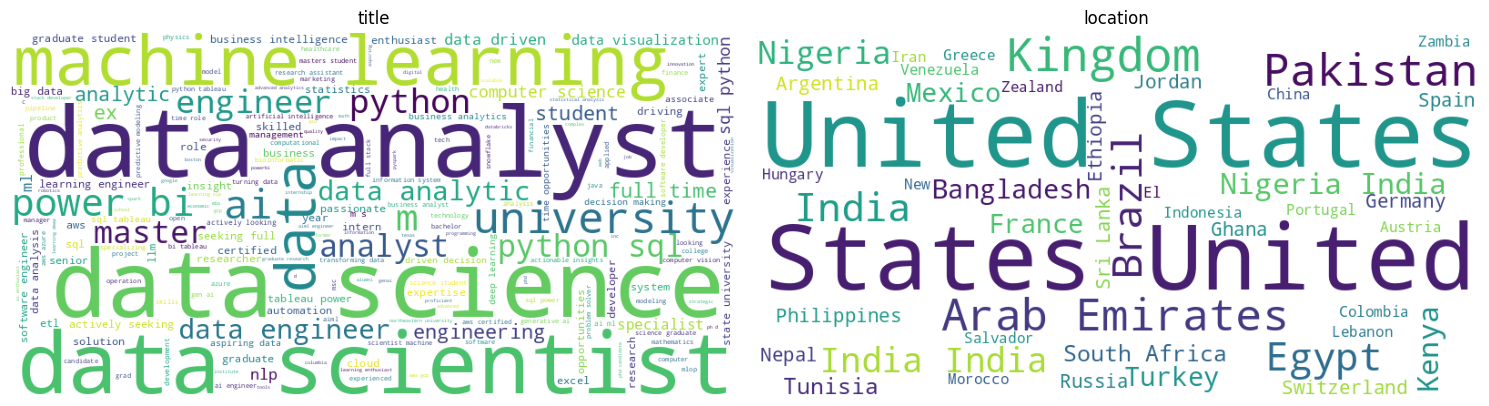

In [52]:
columns = ["title", "location"]  # choose the columns you want

fig, axes = plt.subplots(1, len(columns), figsize=(15, 6))

for ax, column in zip(axes, columns):
    text = " ".join(df[column].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    ax.imshow(wordcloud)
    ax.axis("off")
    ax.set_title(column)

plt.tight_layout()
plt.show()

#### Column by column analysis

#### Title column analysis

#### Examine it for missing values

In [54]:
missing = df["title"].isna().sum()
print(f"missing values: {missing}")

missing values: 4


#### Replace the missing values with a placeholder: Unknown

In [56]:
df["title"] = df["title"].fillna("Unknown")

In [58]:
missing = df["title"].isna().sum()
print(f"missing values: {missing}")

missing values: 0


#### Normalize title column, remove trailing, leading spaces and replace multiple spaces with one

In [60]:
df["title"] = (
    df["title"]
    .str.lower()
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
)
df["title"].head()

0    innovative and driven professional seeking a r...
1    ms applied data science student usc research a...
2    computer science student seeking full-time sof...
3    microsoft certified power bi data analyst mba ...
4    graduate research assistant at uab masters in ...
Name: title, dtype: object

#### Location column analysis

#### Examine it for missing values

In [62]:
missing = df["location"].isna().sum()
print(f"missing values: {missing}")

missing values: 0


#### Normalize location column, remove trailing, leading spaces and replace multiple spaces with one

In [64]:
df["location"] = (
    df["location"]
    .str.lower()
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
)
df["location"].head()

0    united states
1    united states
2    united states
3    united states
4    united states
Name: location, dtype: object

#### Screening_score column analysis

#### Examine it for missing values

In [66]:
missing = df["screening_score"].isna().sum()
print(f"missing values: {missing}")

missing values: 0


#### Examine its stats and visualize its distribution using a box plot and a histogram.

Statistics for 'screening_score' column:
count    1285.0000
mean       62.6132
std        32.1777
min         0.0000
25%        30.0000
50%        80.0000
75%        90.0000
max       100.0000
Name: screening_score, dtype: float64

Skewness of 'screening_score': -0.525
Kurtosis of 'screening_score': -1.1991

Number of Outliers: 0
Percentage of Outliers: 0.00%


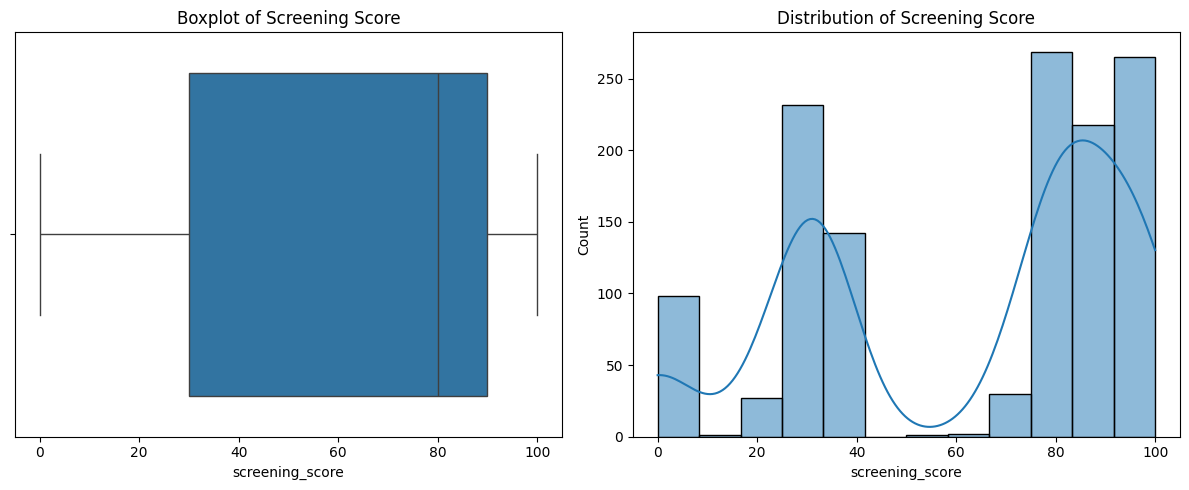

In [88]:
# Summary statistics for 'screening_score' (rounded to 4 decimal places)
screening_stats = df['screening_score'].describe().round(4)
skewness = round(df['screening_score'].skew(), 4)
kurtosis = round(df['screening_score'].kurtosis(), 4)

print("Statistics for 'screening_score' column:")
print(screening_stats)
print(f"\nSkewness of 'screening_score': {skewness}")
print(f"Kurtosis of 'screening_score': {kurtosis}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['screening_score'].quantile(0.25)
Q3 = df['screening_score'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in 'screening_score'
outliers = df[(df['screening_score'] < lower_bound) | (df['screening_score'] > upper_bound)]

# Calculate the number and percentage of outliers
number_outliers = len(outliers)
percentage_outliers = (len(outliers) / len(df)) * 100

# Print number and percentage of outliers
print(f"\nNumber of Outliers: {number_outliers}")
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for 'screening_score' column
sns.boxplot(x=df['screening_score'], ax=axes[0])
axes[0].set_title("Boxplot of Screening Score")

# Histogram for 'screening_score' column
sns.histplot(df['screening_score'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of Screening Score")

plt.tight_layout()
plt.show()

#### Convert the processed dataset to jsonl and save it to the specified path.

In [68]:
df.to_json(
    r"C:\Users\USER\Documents\Potential_Talent\Finetuned_Llama\screening_score_data.jsonl",
    orient="records",
    lines=True
)
print("DataFrame saved as JSONL!")

DataFrame saved as JSONL!


#### import the saved jsonl dataset for prompt-response conversion

In [96]:
import json

#  Load JSONL into DataFrame
file_path = r"C:\Users\USER\Documents\Potential_Talent\llm_fine_tune\Cleaned_data.jsonl"
df = pd.read_json(file_path, lines=True)
df.head()

,id,title,location,screening_score
0,1,innovative and driven professional seeking a r...,united states,100
1,2,ms applied data science student usc research a...,united states,100
2,3,computer science student seeking full-time sof...,united states,100
3,4,microsoft certified power bi data analyst mba ...,united states,100
4,5,graduate research assistant at uab masters in ...,united states,100


#### Convert it to prompt - response

In [98]:
#Convert to prompt-response
def build_prompt_response(row):
    return {
        "prompt": f"Candidate profile:\nTitle: {row['title']}\nLocation: {row['location']}\n\nEvaluate the candidate and assign a screening score.",
        "response": f"Screening score: {int(row['screening_score'])}"
    }

prompt_response_data = [build_prompt_response(row) for _, row in df.iterrows()]

In [100]:
# Preview
for item in prompt_response_data[:5]:
    print(item)

{'prompt': 'Candidate profile:\nTitle: innovative and driven professional seeking a role in data analyticsdata science in the information technology industry.\nLocation: united states\n\nEvaluate the candidate and assign a screening score.', 'response': 'Screening score: 100'}
{'prompt': 'Candidate profile:\nTitle: ms applied data science student usc research assistant usc former data analytics intern at dr reddys laboratories former data science intern quadratyx actively seeking full time roles in summer 2025\nLocation: united states\n\nEvaluate the candidate and assign a screening score.', 'response': 'Screening score: 100'}
{'prompt': 'Candidate profile:\nTitle: computer science student seeking full-time software engineerdeveloper positions ai sql data visualization toolspython ssrs\nLocation: united states\n\nEvaluate the candidate and assign a screening score.', 'response': 'Screening score: 100'}
{'prompt': 'Candidate profile:\nTitle: microsoft certified power bi data analyst mba

#### Save it as jsonl to the specified path

In [102]:
#Save as JSONL
output_file = r"C:\Users\USER\Documents\Potential_Talent\llm_fine_tune\prompt_response_data.jsonl"
with open(output_file, "w", encoding="utf-8") as f:
    for item in prompt_response_data:
        f.write(json.dumps(item) + "\n")

print("Prompt-response JSONL saved!")

Prompt-response JSONL saved!
